<a href="https://colab.research.google.com/github/Mimansha28/Breast_Cancer_Classifier/blob/main/Breat_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Classification System

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing our cancer dataset
df=pd.read_csv("/content/breast_cancer_data.csv")

In [3]:
df.head(5) #checking the dataset

,id,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_WR,texture_WR,perimeter_WR,area_WR,smoothness_WR,compactness_WR,concavity_WR,concave_points_WR,symmetry_WR,fractal_dimension_WR
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# splitting the target column
X=df.iloc[:,2:]
Y=df.iloc[:,1]

In [5]:
print ("Cancer data set dimensions:",format(df.shape))

Cancer data set dimensions: (569, 32)


In [6]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


In [7]:
#checking for null values
df.isnull().sum()
df.isna().sum()

,0
id,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


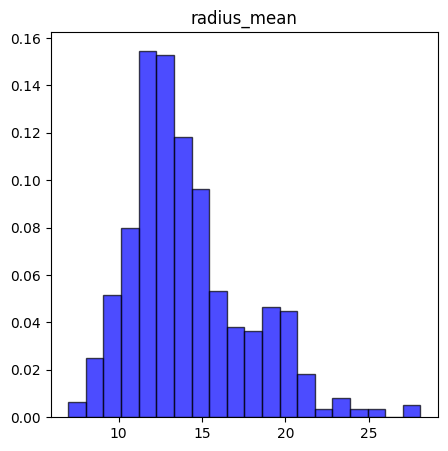

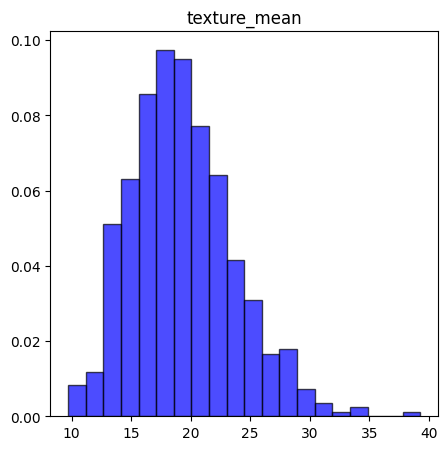

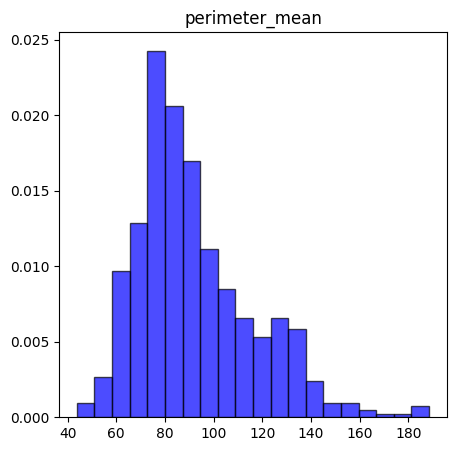

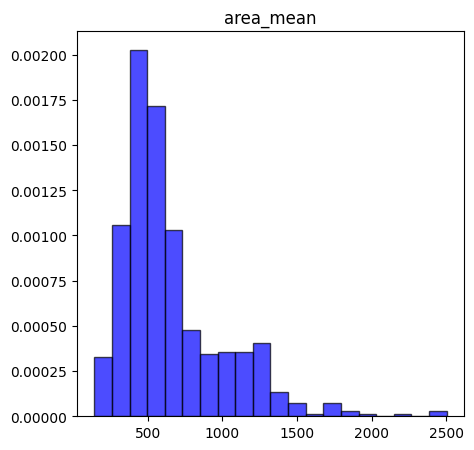

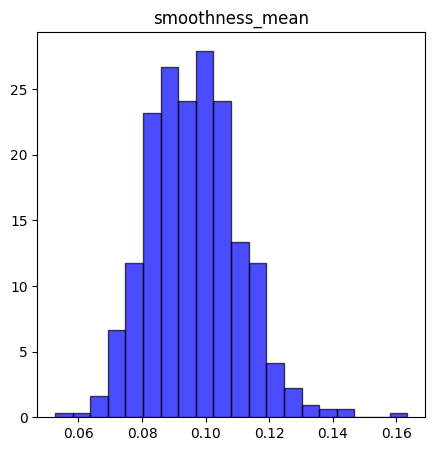

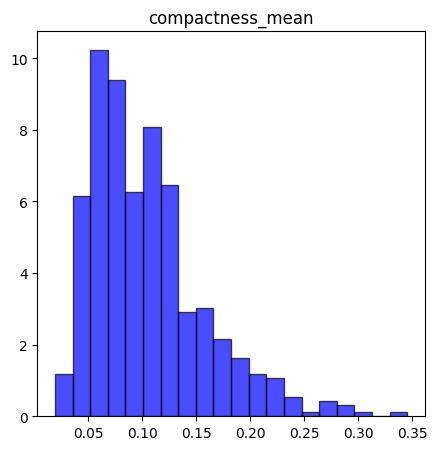

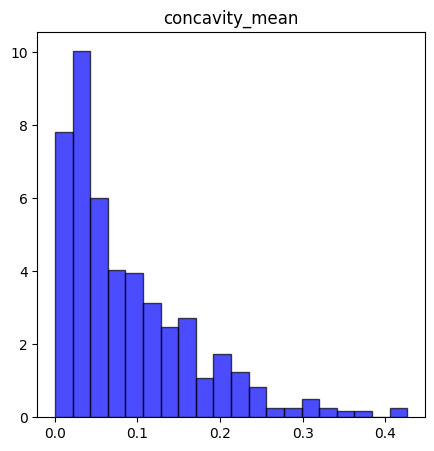

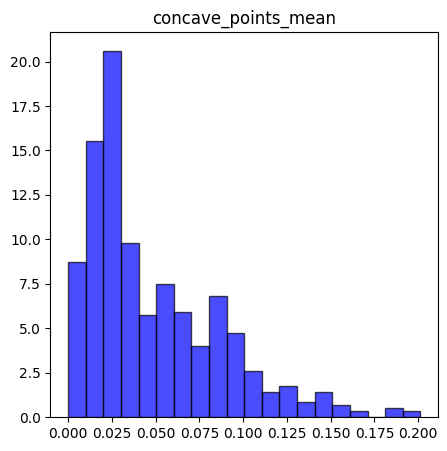

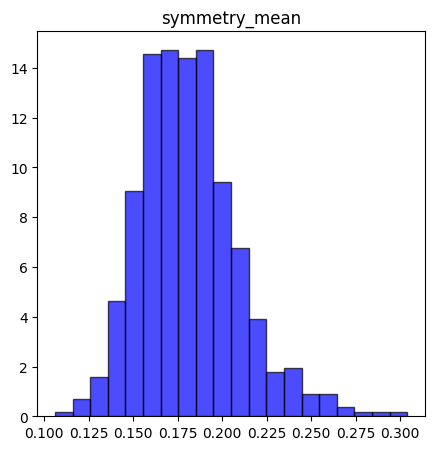

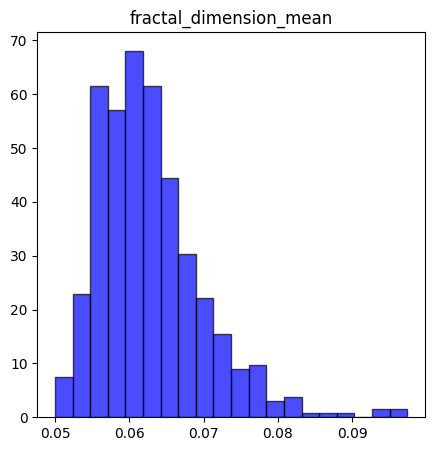

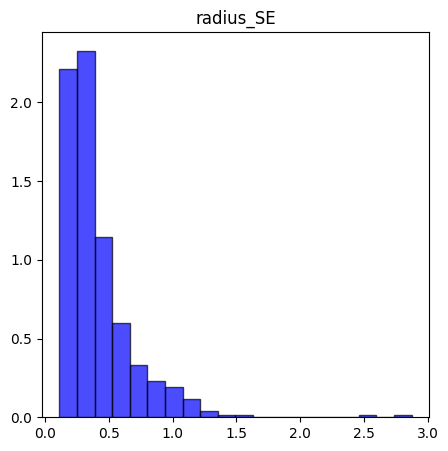

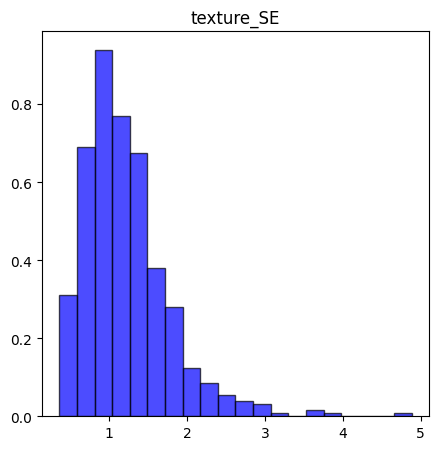

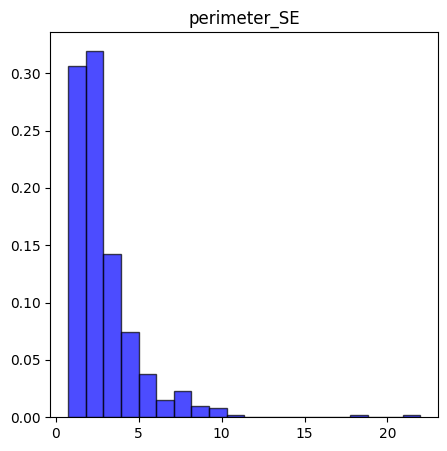

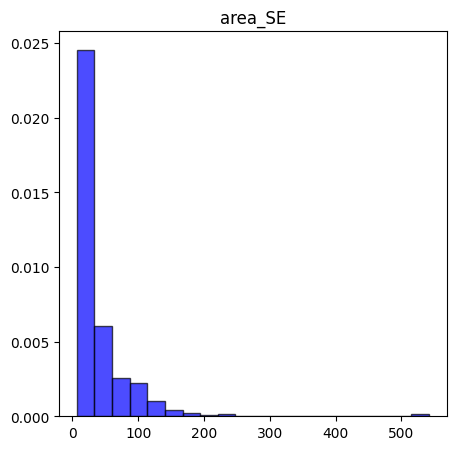

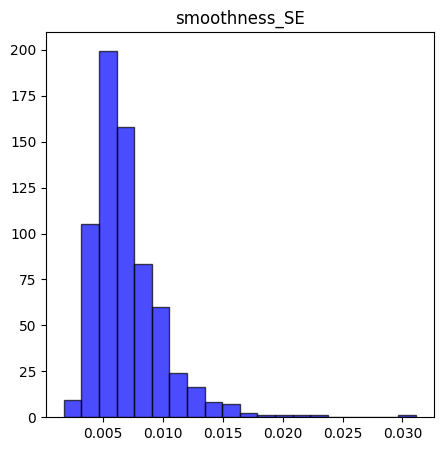

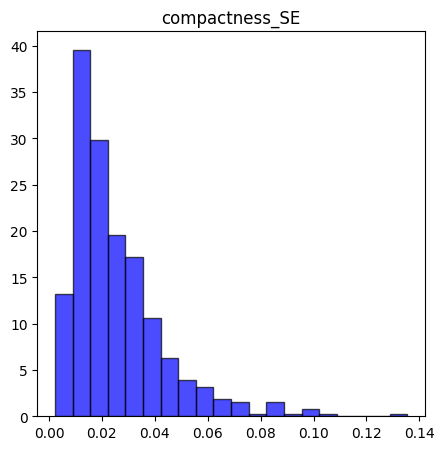

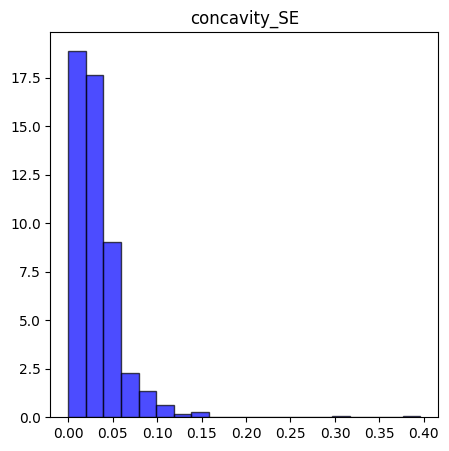

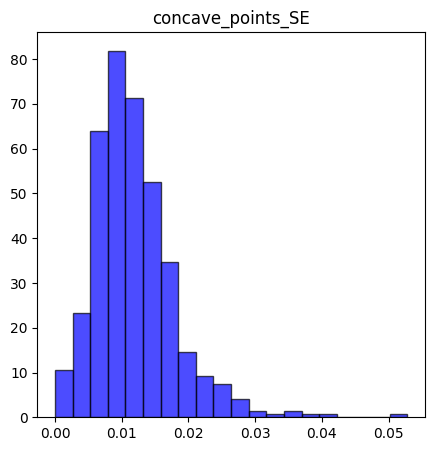

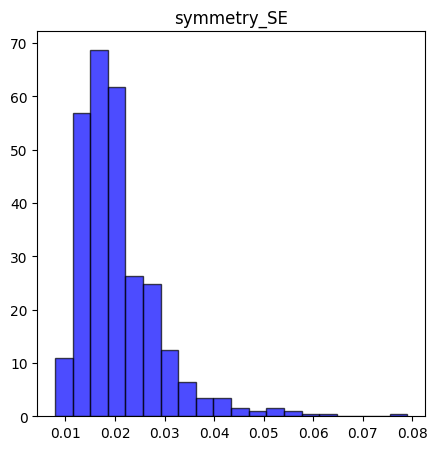

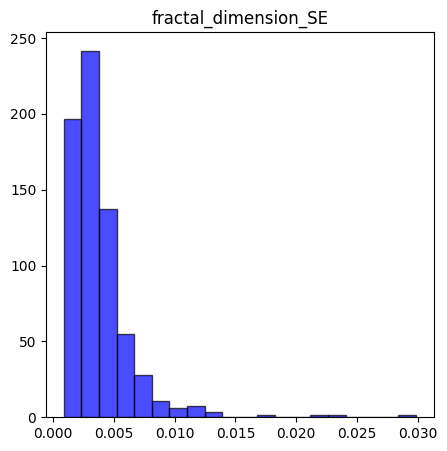

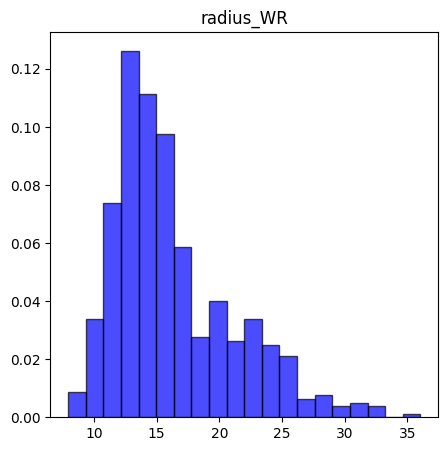

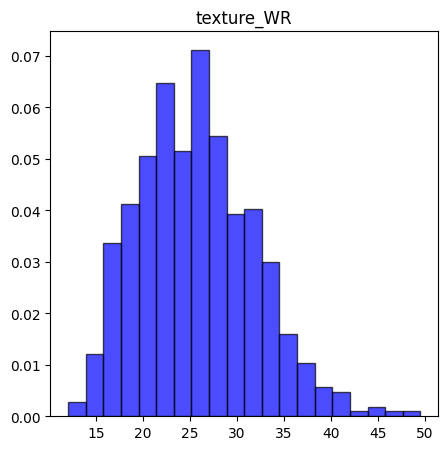

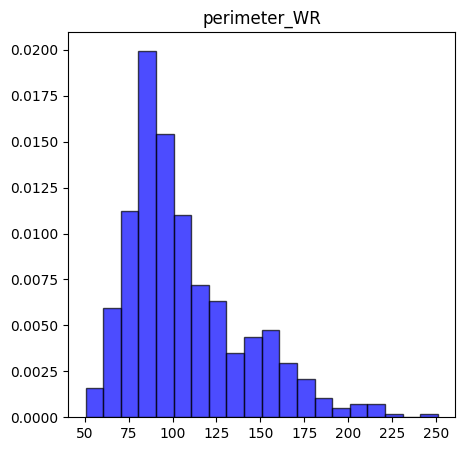

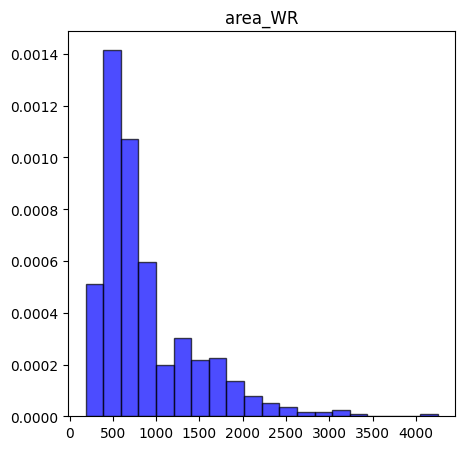

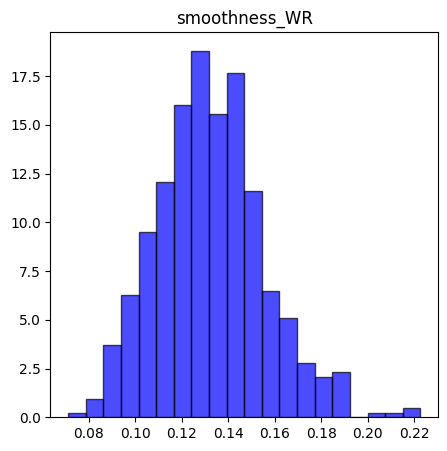

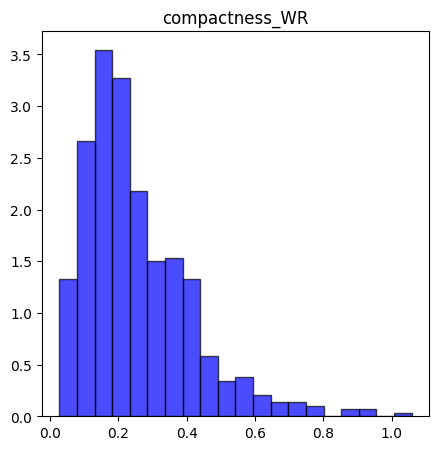

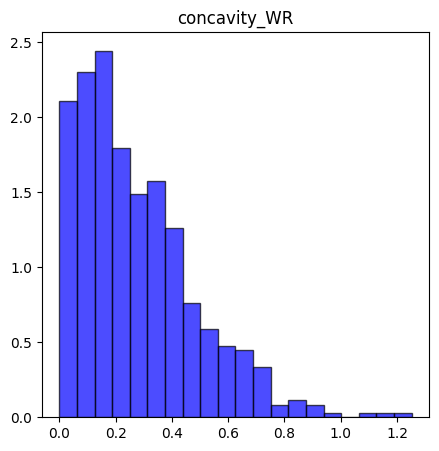

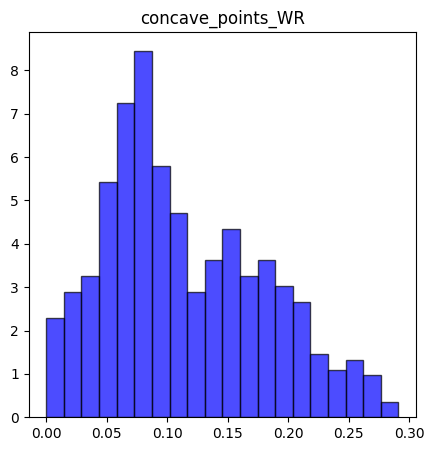

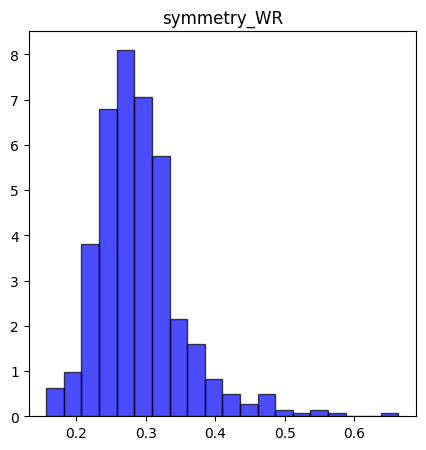

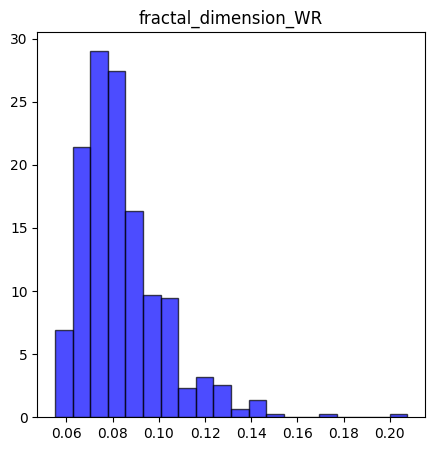

In [8]:
for col in X.columns:
     plt.figure(figsize=(5, 5))
     plt.hist(X[col], color='b', bins=20, density=True, alpha=0.7, edgecolor='black')
     plt.title(f'{col}')
     plt.show()

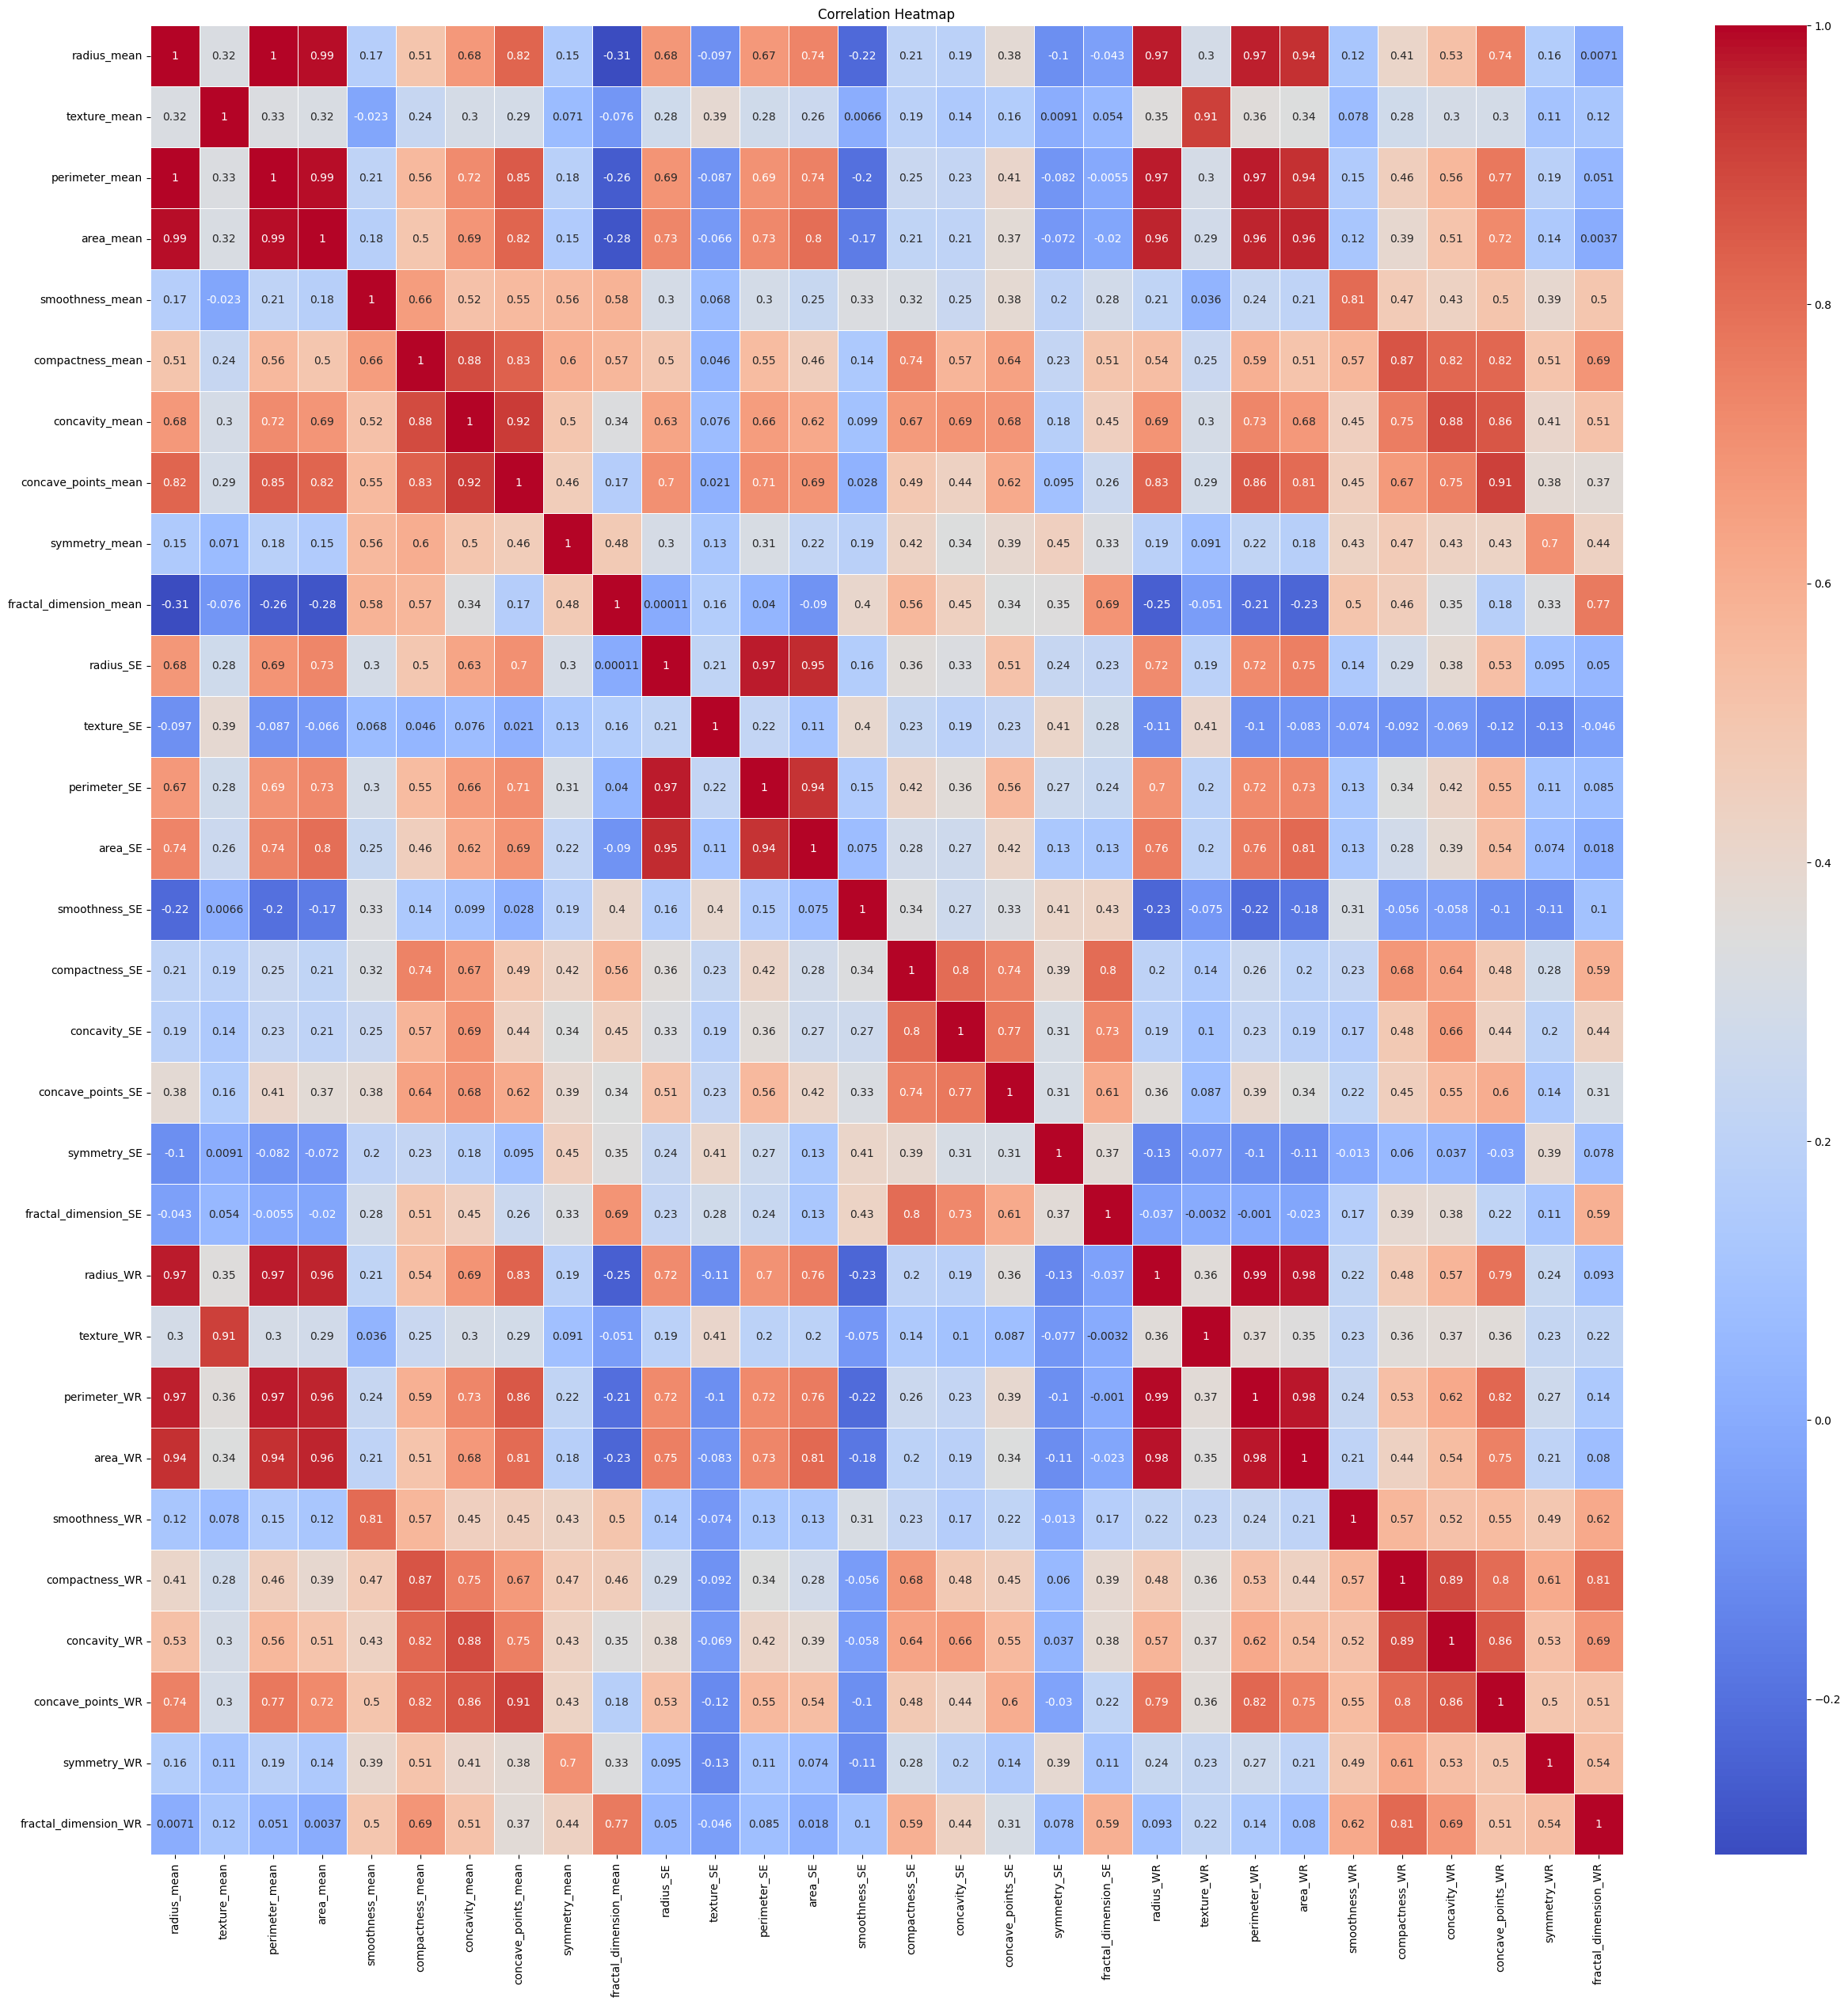

In [9]:
cr=X.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(cr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_test)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)
Y_pred_KNN = KNN.predict(X_test)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, Y_train)
Y_pred_SVM = SVM.predict(X_test)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)

#Using DecisionTreeClassifier of tree classto use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, Y_train)
Y_pred_DT = DT.predict(X_test)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, Y_train)
Y_pred_RF = RF.predict(X_test)

<Axes: >

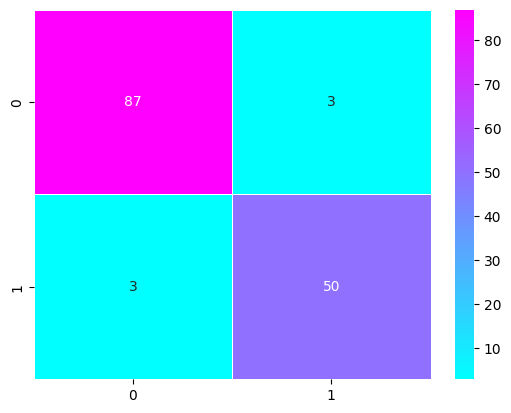

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_LR)
sns.heatmap(cm, annot=True, cmap='cool', linewidths=0.5 )

In [15]:
from sklearn.metrics import accuracy_score
LR_acc=accuracy_score(Y_test, Y_pred_LR)
KNN_acc=accuracy_score(Y_test, Y_pred_KNN)
SVM_acc=accuracy_score(Y_test, Y_pred_SVM)
NB_acc=accuracy_score(Y_test, Y_pred_NB)
DT_acc=accuracy_score(Y_test, Y_pred_DT)
RF_acc=accuracy_score(Y_test, Y_pred_RF)

In [17]:
print(f'Accuracy of Logistics  Regression: {LR_acc:.2f}')
print(f'Accuracy of KNN: {KNN_acc:.2f}')
print(f'Accuracy of SVM: {SVM_acc:.2f}')
print(f'Accuracy of Naive Bayes: {NB_acc:.2f}')
print(f'Accuracy of Decision Tree: {DT_acc:.2f}')
print(f'Accuracy of Random Forest: {RF_acc:.2f}')

Accuracy of Logistics  Regression: 0.96
Accuracy of KNN: 0.95
Accuracy of SVM: 0.97
Accuracy of Naive Bayes: 0.92
Accuracy of Decision Tree: 0.96
Accuracy of Random Forest: 0.99


The **Random Forest** classifier demonstrated the highest accuracy and overall performance, making it the final model choice for this system.